# **Module 6: RNN Assignment**

In [9]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('airline-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data=df['Passengers']

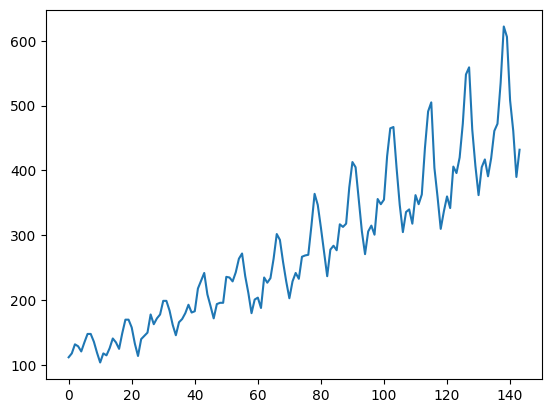

In [6]:
plt.plot(data)

In [7]:
data.shape

(144,)

In [8]:
data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 144 entries, 0 to 143
Series name: Passengers
Non-Null Count  Dtype
--------------  -----
144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


In [11]:
#Feature Scaling
data=np.array(data).reshape(-1,1)
scaler= MinMaxScaler()
data=scaler.fit_transform(data)

In [25]:
train_size=71
test_size=71

In [26]:
train=data[0:train_size,:]
test=data[train_size:,:]

In [27]:
timestamp=10
dataX = []
dataY = []
for i in range(len(train)-timestamp-1):
    a = train[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(train[i+timestamp,0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [28]:
timestamp=10
dataX = []
dataY = []
for i in range(len(test)-timestamp-1):
    a = test[i:(i+timestamp),0]
    dataX.append(a)
    dataY.append(test[i+timestamp,0])
testX = np.array(dataX)
testY = np.array(dataY)

In [29]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

**LSTM MODEL**Method1

In [30]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestamp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
60/60 [==============================] - 5s 5ms/step - loss: 0.0117
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 10/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 11/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 12/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 13/100
60/60 [=================

2/2 [==============================] - 0s 7ms/step


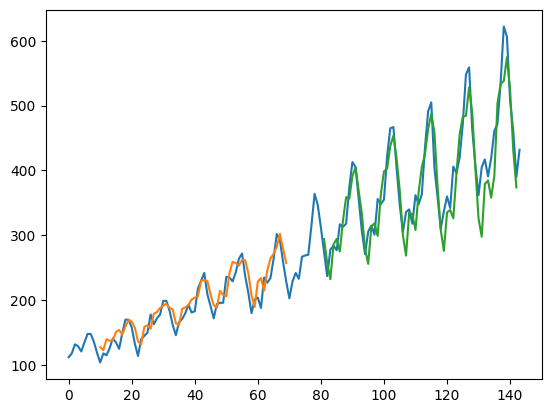

In [31]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])


trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestamp:len(trainPredict)+timestamp, :] = trainPredict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestamp*2)+1:len(data)-1, :] = testPredict

plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**LSTM MODEL**Method2

In [48]:
from tensorflow.keras.optimizers import SGD

# create model
model1 = Sequential()
model1.add(LSTM(10, input_shape=(1, timestamp))) # 10 lstm neuron(block)
model1.add(Dense(1))
# Compile model
epochs = 50
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model1.compile(loss='mean_squared_error', optimizer=sgd)

# Fit the model
model1.fit(trainX, trainY, validation_split=0.33, epochs=epochs, batch_size=1, verbose=2)

Epoch 1/50
40/40 - 5s - loss: 0.0051 - val_loss: 0.0158 - 5s/epoch - 128ms/step
Epoch 2/50
40/40 - 0s - loss: 0.0034 - val_loss: 0.0175 - 224ms/epoch - 6ms/step
Epoch 3/50
40/40 - 0s - loss: 0.0034 - val_loss: 0.0138 - 215ms/epoch - 5ms/step
Epoch 4/50
40/40 - 0s - loss: 0.0033 - val_loss: 0.0152 - 226ms/epoch - 6ms/step
Epoch 5/50
40/40 - 0s - loss: 0.0033 - val_loss: 0.0148 - 237ms/epoch - 6ms/step
Epoch 6/50
40/40 - 0s - loss: 0.0034 - val_loss: 0.0141 - 238ms/epoch - 6ms/step
Epoch 7/50
40/40 - 0s - loss: 0.0032 - val_loss: 0.0161 - 204ms/epoch - 5ms/step
Epoch 8/50
40/40 - 0s - loss: 0.0032 - val_loss: 0.0139 - 215ms/epoch - 5ms/step
Epoch 9/50
40/40 - 0s - loss: 0.0030 - val_loss: 0.0099 - 195ms/epoch - 5ms/step
Epoch 10/50
40/40 - 0s - loss: 0.0032 - val_loss: 0.0134 - 241ms/epoch - 6ms/step
Epoch 11/50
40/40 - 0s - loss: 0.0032 - val_loss: 0.0135 - 343ms/epoch - 9ms/step
Epoch 12/50
40/40 - 0s - loss: 0.0030 - val_loss: 0.0127 - 248ms/epoch - 6ms/step
Epoch 13/50
40/40 - 1s - l

2/2 [==============================] - 0s 4ms/step


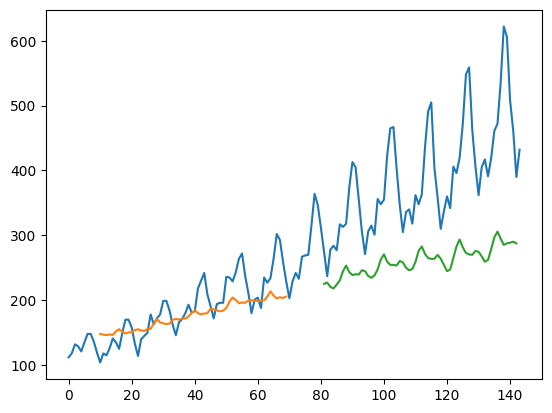

In [49]:
trainPredict = model1.predict(trainX)
testPredict = model1.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])


trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestamp:len(trainPredict)+timestamp, :] = trainPredict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestamp*2)+1:len(data)-1, :] = testPredict

plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()